# Predicting Cholesterol Levels with Multiple Linear Regression

### Import and format data from Kagle's National Health and Nutrition Examination dataset

In [33]:
import pandas as pd
import numpy as np

In [163]:
# read csv files

demographics = pd.read_csv('national-health-and-nutrition-examination-survey/demographic.csv')
diet = pd.read_csv('national-health-and-nutrition-examination-survey/diet.csv')
examination = pd.read_csv('national-health-and-nutrition-examination-survey/examination.csv')
labs = pd.read_csv('national-health-and-nutrition-examination-survey/labs.csv')
#medications = pd.read_csv('national-health-and-nutrition-examination-survey/medications.csv')
questionnaire = pd.read_csv('national-health-and-nutrition-examination-survey/questionnaire.csv')

In [164]:
examination.head(10)

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4,BMDSTATS,BMXWT,...,CSQ490,CSXQUIPG,CSXQUIPT,CSXNAPG,CSXNAPT,CSXQUISG,CSXQUIST,CSXSLTSG,CSXSLTST,CSXNASG,CSXNAST,CSXTSEQ,CSXCHOOD,CSXSBOD,CSXSMKOD,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,140.0,122.0,72.0,2.0,114.0,76.0,2.0,102.0,74.0,2.0,NaN,NaN,NaN,1,78.3,...,55.0,15.0,4.0,50.0,1.0,50.0,2.0,65.0,1.0,60.0,1.0,B,2.0,4.0,3.0,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,170.0,156.0,62.0,2.0,160.0,80.0,2.0,156.0,42.0,2.0,NaN,NaN,NaN,1,89.5,...,51.0,1.0,4.0,5.0,4.0,57.0,2.0,33.0,1.0,27.0,1.0,A,2.0,1.0,3.0,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,160.0,140.0,90.0,2.0,140.0,76.0,2.0,146.0,80.0,2.0,NaN,NaN,NaN,1,88.9,...,47.0,17.0,1.0,27.0,1.0,56.0,2.0,53.0,1.0,32.0,1.0,A,2.0,1.0,3.0,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,130.0,108.0,38.0,2.0,102.0,34.0,2.0,104.0,38.0,2.0,NaN,NaN,NaN,1,32.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,170.0,136.0,86.0,2.0,134.0,88.0,1.0,142.0,86.0,2.0,NaN,NaN,NaN,3,52.0,...,100.0,40.0,2.0,54.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,A,2.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0
5,73562,1,1064.0,NaN,NaN,1.0,5.0,60.0,1.0,1.0,180.0,160.0,84.0,2.0,158.0,82.0,2.0,154.0,80.0,2.0,NaN,NaN,NaN,1,105.0,...,70.0,0.0,4.0,10.0,1.0,25.0,2.0,25.0,1.0,12.0,1.0,B,2.0,1.0,3.0,3.0,1.0,2.0,3.0,4.0,21.0,1.0,NaN,NaN,1.0
6,73563,1,90.0,NaN,152.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,7.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,1,954.0,NaN,NaN,1.0,5.0,82.0,1.0,1.0,150.0,118.0,80.0,2.0,124.0,80.0,2.0,126.0,82.0,2.0,NaN,NaN,NaN,1,93.4,...,50.0,35.0,2.0,52.0,1.0,60.0,2.0,55.0,1.0,32.0,1.0,A,2.0,1.0,3.0,3.0,1.0,2.0,3.0,4.0,NaN,NaN,12.0,1.0,1.0
8,73566,1,625.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,140.0,128.0,74.0,2.0,124.0,72.0,2.0,114.0,72.0,2.0,NaN,NaN,NaN,1,61.8,...,80.0,35.0,2.0,25.0,1.0,75.0,2.0,50.0,1.0,20.0,1.0,B,2.0,1.0,3.0,3.0,1.0,2.0,3.0,4.0,NaN,NaN,20.0,1.0,1.0
9,73567,1,932.0,NaN,NaN,1.0,3.0,70.0,1.0,1.0,170.0,140.0,78.0,2.0,142.0,78.0,2.0,142.0,76.0,2.0,NaN,NaN,NaN,1,65.3,...,33.0,5.0,3.0,12.0,3.0,98.0,3.0,95.0,1.0,52.0,1.0,B,2.0,1.0,3.0,3.0,1.0,2.0,3.0,4.0,NaN,NaN,54.0,1.0,1.0


In [184]:
# Select variables of interest from each dataset

de_keep=['DMDBORN4',
'DMDMARTL',
#'INDHHIN2',
'INDFMPIR',
'RIAGENDR',
'RIDAGEYR',
'RIDRETH1',
'SEQN']

di_keep=['DBD100',
'DR1TALCO',
'SEQN',
'DR1TMFAT',
'DR1TPFAT',
'DR1TSFAT',
'DR1TTFAT']

ex_keep=['BPXDI1',
#'BPXDI2',
#'BPXDI3',
#'BPXDI4',
'BPXSY1',
#'BPXSY2',
#'BPXSY3',
#'BPXSY4',
'PEASCST1',
'SEQN',
'BMXHT',
'BMXWAIST',
'BMXWT',
'SEQN']

la_keep=['SEQN',
'LBDHDD',
'LBDLDL']

qu_keep=['SEQN',
         'DID040',
#          'SMD055', 
          'SMD057',
#          'SMQ020',
#          'SMQ040',
         'SMD641',
         'SMD650',
         'PAQ677',
         'PAQ605']

In [166]:
# Filter each dataset to fields of interest

demographics_short = demographics.loc[:, de_keep]
demographics_short['DMDMARTL']=demographics_short['DMDMARTL'].fillna(0) #Fill in NaN's with 0's
demographics_short.sample(10)

,DMDBORN4,DMDMARTL,INDFMPIR,RIAGENDR,RIDAGEYR,RIDRETH1,SEQN
351,1,1.0,3.22,1,67,3,73908
1758,1,1.0,3.18,1,67,3,75315
2872,2,1.0,NaN,1,63,2,76429
1799,1,2.0,NaN,2,80,3,75356
8519,1,0.0,2.87,2,5,5,82076
5717,1,1.0,1.46,2,44,1,79274
2075,1,0.0,0.91,2,3,5,75632
9686,1,0.0,NaN,2,6,3,83243
8704,1,1.0,0.35,1,42,3,82261
9947,2,0.0,1.40,2,2,5,83504


In [167]:
# Filter each dataset to fields of interest

diet_short = diet.loc[:, di_keep]
diet_short['DBD100']=diet_short['DBD100'].fillna(0) #Fill in NaN's with 0's
diet_short['DR1TMFAT']=diet_short['DR1TMFAT'].fillna(diet_short['DR1TMFAT'].mean()) #Fill in NaN's with mean
diet_short['DR1TPFAT']=diet_short['DR1TPFAT'].fillna(diet_short['DR1TPFAT'].mean()) #Fill in NaN's with 0's
diet_short['DR1TSFAT']=diet_short['DR1TSFAT'].fillna(diet_short['DR1TSFAT'].mean()) #Fill in NaN's with 0's
diet_short['DR1TTFAT']=diet_short['DR1TTFAT'].fillna(diet_short['DR1TTFAT'].mean()) #Fill in NaN's with 0's

diet_short.tail(10)

,DBD100,DR1TALCO,SEQN,DR1TMFAT,DR1TPFAT,DR1TSFAT,DR1TTFAT
9803,0.0,0.0,83722,16.065000,8.393000,17.948000,43.4000
9804,0.0,0.0,83723,27.104000,19.503000,35.266000,95.3600
9805,0.0,0.0,83724,20.991000,18.247000,24.006000,69.2600
9806,0.0,NaN,83725,25.833632,17.394578,24.764254,75.0988
9807,0.0,NaN,83726,25.833632,17.394578,24.764254,75.0988
9808,1.0,14.0,83727,57.943000,30.600000,80.414000,193.5100
9809,0.0,0.0,83728,15.965000,5.387000,24.459000,52.3900
9810,0.0,0.0,83729,33.540000,37.623000,29.372000,110.3000
9811,0.0,NaN,83730,25.833632,17.394578,24.764254,75.0988
9812,0.0,0.0,83731,24.252000,23.867000,24.838000,78.6300


In [229]:
# Filter each dataset to fields of interest

exam_short = examination.loc[:, ex_keep]
exam_short=exam_short.iloc[:, :-1] # drops the last column, which was a duplicated SEQN
exam_short.sample(10)

,BPXDI1,BPXSY1,PEASCST1,SEQN,BMXHT,BMXWAIST,BMXWT
5992,0.0,110.0,1,79772,157.4,81.5,63.0
3625,72.0,106.0,1,77320,170.8,69.7,57.8
161,86.0,148.0,1,73726,149.0,87.3,52.3
4224,98.0,168.0,1,77938,176.2,116.0,110.7
6565,66.0,154.0,1,80367,146.8,95.5,63.3
2597,54.0,138.0,1,76243,153.0,130.1,118.0
1642,74.0,130.0,1,75256,171.8,108.2,89.0
4515,58.0,152.0,1,78238,143.0,83.0,43.5
4485,86.0,148.0,1,78208,176.0,92.3,74.2
3766,82.0,146.0,1,77471,170.5,108.4,89.1


In [231]:
# Filter each dataset to fields of interest

labs_short = labs.loc[:, la_keep]
labs_short.sample(10)

,SEQN,LBDHDD,LBDLDL
7017,80836,NaN,NaN
4038,77749,NaN,NaN
5261,79010,NaN,NaN
5104,78849,NaN,NaN
1729,75344,50.0,NaN
901,74489,58.0,NaN
7740,81580,55.0,87.0
1776,75392,40.0,127.0
3687,77388,47.0,NaN
5411,79174,NaN,NaN


In [234]:
questionnaire_short = questionnaire.loc[:, qu_keep]
questionnaire_short['DID040']=questionnaire_short['DID040'].fillna(0)
questionnaire_short['Diabetes_CAT']=questionnaire_short['DID040'].apply(lambda x: 1 if x>0 else 0)
questionnaire_short['SMD057']=questionnaire_short['SMD057'].fillna(0)
#questionnaire_short['PAQ677']=questionnaire_short['PAQ677'].fillna(0)
questionnaire_short['SMD641']=questionnaire_short['SMD641'].fillna(0)
questionnaire_short['SMD650']=questionnaire_short['SMD650'].fillna(0)
questionnaire_short.tail(5)


,SEQN,DID040,SMD057,SMD641,SMD650,PAQ677,PAQ605,Diabetes_CAT
10170,83727,0.0,0.0,0.0,0.0,NaN,2.0,0
10171,83728,0.0,0.0,0.0,0.0,NaN,NaN,0
10172,83729,0.0,0.0,0.0,0.0,NaN,2.0,0
10173,83730,0.0,0.0,0.0,0.0,NaN,NaN,0
10174,83731,0.0,0.0,0.0,0.0,NaN,NaN,0


In [171]:
# This option lets us see more columns in preview field

pd.set_option('display.max_columns',50)

In [213]:
# merge all dataframes together on SEQN field

df = pd.merge(labs_short,demographics_short,on='SEQN')
df = pd.merge(df,exam_short,on='SEQN')
df = pd.merge(df,diet_short,on='SEQN')
df = pd.merge(df,questionnaire_short,on='SEQN')

df.shape

(9813, 28)

In [214]:
# Convert from metric to imperial units

df['Height-in']=df['BMXHT']*0.393701
df['Weight-lb']=df['BMXWT']*2.20462
df['Numb_Smoked_30_days']=(df['SMD641']*df['SMD650'])
df['Cardio_days_per_week']=df['PAQ677'].fillna(0)+df['PAQ605'].apply(lambda x: 5 if x<2 else 0)
df['Cardio_days_per_week']=df['Cardio_days_per_week'].apply(lambda x: 7 if x>7 else x)
df=df.drop(columns=['BMXHT', 'BMXWT','SMD641','SMD650','PAQ677','PAQ605'])

In [215]:
df.head(50)

,SEQN,LBDHDD,LBDLDL,DMDBORN4,DMDMARTL,INDFMPIR,RIAGENDR,RIDAGEYR,RIDRETH1,BPXDI1,BPXSY1,PEASCST1,BMXWAIST,DBD100,DR1TALCO,DR1TMFAT,DR1TPFAT,DR1TSFAT,DR1TTFAT,DID040,SMD057,Diabetes_CAT,Height-in,Weight-lb,Numb_Smoked_30_days,Cardio_days_per_week
0,73557,65.0,NaN,1,4.0,0.84,1,69,4,72.0,122.0,1,100.0,2.0,0.0,18.493000,8.829000,17.819000,52.8100,62.0,2.0,1,67.440981,172.621746,0.0,0.0
1,73558,50.0,NaN,1,1.0,1.78,1,54,3,62.0,156.0,1,107.6,2.0,119.0,35.481000,20.505000,53.408000,124.2900,23.0,0.0,1,69.606337,197.313490,1.0,0.0
2,73559,60.0,56.0,1,1.0,4.51,1,72,3,90.0,140.0,1,109.2,1.0,0.0,20.902000,12.953000,25.263000,65.9700,57.0,3.0,1,69.015785,195.990718,0.0,0.0
3,73560,61.0,NaN,1,0.0,2.52,1,9,3,38.0,108.0,1,61.0,1.0,0.0,16.986000,9.617000,23.511000,58.2700,0.0,0.0,0,54.055147,70.988764,0.0,0.0
4,73561,85.0,101.0,1,1.0,5.00,2,73,3,86.0,136.0,1,NaN,0.0,0.0,26.216000,1.263000,4.479000,55.3600,0.0,0.0,0,63.937042,114.640240,0.0,0.0
5,73562,38.0,NaN,1,3.0,4.79,1,56,1,84.0,160.0,1,123.1,3.0,0.0,40.013000,23.550000,22.155000,93.9200,0.0,5.0,0,62.480349,231.485100,0.0,5.0
6,73563,NaN,NaN,1,0.0,5.00,1,0,3,NaN,NaN,1,NaN,0.0,NaN,25.833632,17.394578,24.764254,75.0988,0.0,0.0,0,NaN,16.314188,0.0,0.0
7,73564,58.0,97.0,1,2.0,5.00,2,61,3,80.0,118.0,1,110.8,0.0,34.2,20.970000,37.652000,25.989000,91.0300,0.0,0.0,0,63.700822,205.911508,0.0,0.0
8,73566,59.0,NaN,1,3.0,0.48,2,56,3,74.0,128.0,1,85.5,0.0,22.3,14.878000,13.600000,10.911000,41.3100,0.0,0.0,0,60.157513,136.245516,30.0,5.0
9,73567,79.0,NaN,1,2.0,1.20,1,65,3,78.0,140.0,1,93.7,1.0,39.1,24.300000,24.586000,28.438000,82.9500,0.0,0.0,0,67.874052,143.961686,750.0,5.0


In [216]:
# Filter data to individuals with complete data

df_trimmed=df.dropna(how='any').reset_index(drop=True)
df_trimmed

,SEQN,LBDHDD,LBDLDL,DMDBORN4,DMDMARTL,INDFMPIR,RIAGENDR,RIDAGEYR,RIDRETH1,BPXDI1,BPXSY1,PEASCST1,BMXWAIST,DBD100,DR1TALCO,DR1TMFAT,DR1TPFAT,DR1TSFAT,DR1TTFAT,DID040,SMD057,Diabetes_CAT,Height-in,Weight-lb,Numb_Smoked_30_days,Cardio_days_per_week
0,73559,60.0,56.0,1,1.0,4.51,1,72,3,90.0,140.0,1,109.2,1.0,0.0,20.902,12.953,25.263,65.97,57.0,3.0,1,69.015785,195.990718,0.0,0.0
1,73564,58.0,97.0,1,2.0,5.00,2,61,3,80.0,118.0,1,110.8,0.0,34.2,20.970,37.652,25.989,91.03,0.0,0.0,0,63.700822,205.911508,0.0,0.0
2,73568,96.0,67.0,1,5.0,5.00,2,26,3,60.0,106.0,1,73.7,2.0,28.1,57.929,32.571,66.642,172.21,0.0,0.0,0,60.039403,103.837602,0.0,0.0
3,73574,53.0,75.0,2,1.0,2.10,2,33,5,56.0,122.0,1,78.7,0.0,0.0,92.405,50.794,80.879,249.49,0.0,0.0,0,62.204758,125.222416,0.0,0.0
4,73576,61.0,82.0,1,0.0,1.58,1,16,4,68.0,108.0,1,74.2,0.0,0.0,8.835,6.313,7.143,25.14,0.0,0.0,0,67.086650,148.370926,0.0,0.0
5,73577,33.0,119.0,2,6.0,0.29,1,32,1,74.0,118.0,1,100.0,2.0,0.0,42.117,16.147,48.486,121.74,0.0,20.0,0,65.433106,175.708214,0.0,0.0
6,73581,78.0,105.0,2,1.0,5.00,1,50,5,80.0,138.0,1,99.3,0.0,0.0,22.895,13.006,20.273,63.95,0.0,0.0,0,72.834685,178.353758,0.0,0.0
7,73587,34.0,110.0,1,0.0,3.33,1,14,5,72.0,112.0,1,115.9,2.0,0.0,9.375,3.911,8.398,21.22,0.0,0.0,0,66.456729,242.949124,0.0,3.0
8,73596,56.0,78.0,2,1.0,5.00,2,57,5,72.0,128.0,1,117.8,2.0,0.0,40.652,20.397,24.489,92.77,0.0,1.0,0,64.842555,229.280480,0.0,0.0
9,73600,42.0,113.0,1,3.0,0.63,1,37,4,90.0,144.0,1,122.9,0.0,0.0,33.068,11.925,30.553,85.82,0.0,0.0,0,72.874055,278.223044,600.0,5.0


### Use web scraping to get BMI Data

###### Web Scraping BMI Table

In [85]:
import requests
from bs4 import BeautifulSoup

In [86]:
# Get HTML Code with BeautifulSoup

url1 = 'https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.htm'
url2 = 'https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl2.htm'
page1 = BeautifulSoup(requests.get(url1).text,'lxml-xml')
page2 = BeautifulSoup(requests.get(url2).text,"lxml-xml")


In [87]:
# Isolate the BMI Tables

BMI_table1=page1.find_all('table')[2]
BMI_table2=page2.find_all('table')[2]


In [88]:
# Extract column headers i.e. BMIs

column_headers1=["Height"]
for i in range(1,18):
    header=BMI_table1.find_all('th')[i].text
    column_headers1.append(header)

column_headers2=[]
for i in range(1,20):
    header=BMI_table2.find_all('th')[i].text
    column_headers2.append(header)

In [89]:
# Make a list of each row's data for each of the 2 tables 

list_of_lists1=[]

for row in range(0,19):
    row_list=[]
    for item in range(0,18):
        tbody1=BMI_table1.find_all('tbody')[0]
        if item==0:
            row_list.append(tbody1.find_all('th')[row].text)
        else:
            row_list.append(tbody1.find_all('tr')[row].find_all('td')[item-1].text)
    list_of_lists1.append(row_list)
#list_of_lists1
    
list_of_lists2=[]
for row in range(0,19):
    row_list=[]
    for item in range(1,20):
        tbody2=BMI_table2.find_all('tbody')[0]
        row_list.append(tbody2.find_all('tr')[row].find_all('td')[item-1].text)
    list_of_lists2.append(row_list)
#list_of_lists2

In [90]:
# Join tables 1 and 2 to get full BMI table

BMI_tbl1=pd.DataFrame(list_of_lists1,columns=column_headers1)
BMI_tbl2=pd.DataFrame(list_of_lists2,columns=column_headers2)
BMI_table=BMI_tbl1.join(BMI_tbl2)
BMI_table

,Height,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,58,91,96,100,105,110,115,119,124,129,134,138,143,148,153,158,162,167,172,177,181,186,191,196,201,205,210,215,220,224,229,234,239,244,248,253,258
1,59,94,99,104,109,114,119,124,128,133,138,143,148,153,158,163,168,173,178,183,188,193,198,203,208,212,217,222,227,232,237,242,247,252,257,262,267
2,60,97,102,107,112,118,123,128,133,138,143,148,153,158,163,168,174,179,184,189,194,199,204,209,215,220,225,230,235,240,245,250,255,261,266,271,276
3,61,100,106,111,116,122,127,132,137,143,148,153,158,164,169,174,180,185,190,195,201,206,211,217,222,227,232,238,243,248,254,259,264,269,275,280,285
4,62,104,109,115,120,126,131,136,142,147,153,158,164,169,175,180,186,191,196,202,207,213,218,224,229,235,240,246,251,256,262,267,273,278,284,289,295
5,63,107,113,118,124,130,135,141,146,152,158,163,169,175,180,186,191,197,203,208,214,220,225,231,237,242,248,254,259,265,270,278,282,287,293,299,304
6,64,110,116,122,128,134,140,145,151,157,163,169,174,180,186,192,197,204,209,215,221,227,232,238,244,250,256,262,267,273,279,285,291,296,302,308,314
7,65,114,120,126,132,138,144,150,156,162,168,174,180,186,192,198,204,210,216,222,228,234,240,246,252,258,264,270,276,282,288,294,300,306,312,318,324
8,66,118,124,130,136,142,148,155,161,167,173,179,186,192,198,204,210,216,223,229,235,241,247,253,260,266,272,278,284,291,297,303,309,315,322,328,334
9,67,121,127,134,140,146,153,159,166,172,178,185,191,198,204,211,217,223,230,236,242,249,255,261,268,274,280,287,293,299,306,312,319,325,331,338,344


###### Create formula to calculate BMI, given height and weight

In [91]:
# This formula returns BMI even for height/weight values outside the range of the BMI chart

def lookup_BMI(weight,height):
    if height<58 or height>76:
        return round((weight*0.45)/((height*0.025)**2),1)
    else:
        index_h=0
        for i in range(BMI_table.shape[0]-1):
            if int(BMI_table.iloc[i,0])+.5<=height:
                index_h=i
            else:
                index_h=max(0,index_h)

        if weight<int(BMI_table.iloc[index_h,1]) or weight>int(BMI_table.iloc[index_h,36]):
            return round((weight*0.45)/((height*0.025)**2),1)
        else:
            index_w=1
            for i in range(BMI_table.shape[1]-1):
                if int(BMI_table.iloc[index_h,i])+.5<weight:
                    index_w=i
                else:
                    index_w=max(1,index_w)
    
            my_l=[]
            my_l.append(int(BMI_table.iloc[index_h,index_w-1]))
            my_l.append(int(BMI_table.iloc[index_h,index_w]))

            if my_l.index(min(my_l, key=lambda x:abs(x-weight)))==0:
                return int(BMI_table.columns[index_w-1])
            else:
                return int(BMI_table.columns[index_w])

In [92]:
height=69.015785
weight=195.990718
lookup_BMI(weight,height)

29

In [93]:
# # This worked as long as height and weight were inside the bounds of my chart. It broke when height or weight were out of bounds


# height=69.4
# weight=150

# def lookup_BMI(weight,height):
    
#     index_h=0
#     while int(BMI_table.iloc[index_h,0])+.5<=height:
#         index_h+=1

#     index_w=0
#     while int(BMI_table.iloc[index_h,index_w])<weight:
#         index_w+=1
    
#     my_l=[]
#     my_l.append(int(BMI_table.iloc[index_h,index_w-1]))
#     my_l.append(int(BMI_table.iloc[index_h,index_w]))

#     if my_l.index(min(my_l, key=lambda x:abs(x-weight)))==0:
#         return int(BMI_table.columns[index_w-1])
#     else:
#         return int(BMI_table.columns[index_w])



# lookup_BMI(weight,height)

In [94]:
# # This worked as long as height and weight were inside the bounds of my chart. It broke when height or weight were out of bounds

# def lookup_BMI_v2(tup):
#     try:
#         index_h=0
#         while int(BMI_table.iloc[index_h,0])+.5<=tup[1]:
#             index_h+=1

#         index_w=0
#         while int(BMI_table.iloc[index_h,index_w])<tup[0]:
#             index_w+=1
    
#         my_l=[]
#         my_l.append(int(BMI_table.iloc[index_h,index_w-1]))
#         my_l.append(int(BMI_table.iloc[index_h,index_w]))

#         if my_l.index(min(my_l, key=lambda x:abs(x-tup[0])))==0:
#             return int(BMI_table.columns[index_w-1])
#         else:
#             return int(BMI_table.columns[index_w])
#     except:
#         print(tup)

# height=[69.4, 68]
# weight=[150,190]
# tuple_list=list(zip(height,weight))
# #[lookup_BMI_v2(wh) for (wh) in (tuple_list)]
# # [(w,h) for (w,h) in (tuple_list)]

In [217]:
array_BMI=np.vectorize(lookup_BMI)(np.array(df_trimmed['Weight-lb']),np.array(df_trimmed['Height-in']))
df_BMI=pd.DataFrame(array_BMI, columns=["BMI"])
df_with_BMI=df_trimmed.join(df_BMI)
df_with_BMI.head(5)

,SEQN,LBDHDD,LBDLDL,DMDBORN4,DMDMARTL,INDFMPIR,RIAGENDR,RIDAGEYR,RIDRETH1,BPXDI1,BPXSY1,PEASCST1,BMXWAIST,DBD100,DR1TALCO,DR1TMFAT,DR1TPFAT,DR1TSFAT,DR1TTFAT,DID040,SMD057,Diabetes_CAT,Height-in,Weight-lb,Numb_Smoked_30_days,Cardio_days_per_week,BMI
0,73559,60.0,56.0,1,1.0,4.51,1,72,3,90.0,140.0,1,109.2,1.0,0.0,20.902,12.953,25.263,65.97,57.0,3.0,1,69.015785,195.990718,0.0,0.0,29
1,73564,58.0,97.0,1,2.0,5.00,2,61,3,80.0,118.0,1,110.8,0.0,34.2,20.970,37.652,25.989,91.03,0.0,0.0,0,63.700822,205.911508,0.0,0.0,36
2,73568,96.0,67.0,1,5.0,5.00,2,26,3,60.0,106.0,1,73.7,2.0,28.1,57.929,32.571,66.642,172.21,0.0,0.0,0,60.039403,103.837602,0.0,0.0,20
3,73574,53.0,75.0,2,1.0,2.10,2,33,5,56.0,122.0,1,78.7,0.0,0.0,92.405,50.794,80.879,249.49,0.0,0.0,0,62.204758,125.222416,0.0,0.0,23
4,73576,61.0,82.0,1,0.0,1.58,1,16,4,68.0,108.0,1,74.2,0.0,0.0,8.835,6.313,7.143,25.14,0.0,0.0,0,67.086650,148.370926,0.0,0.0,23


In [96]:
# # Alternative way of doing the above
# count_up_to=df_trimmed.shape[0]
# BMI=[]
# for row in range(count_up_to):
#     bmi_val=lookup_BMI(df_trimmed['Weight-lb'].iloc[row],df_trimmed['Height-in'].iloc[row])
#     BMI.append(bmi_val)
    
# BMI_df=pd.DataFrame(BMI, columns=["BMI"])

In [97]:
# # Alternative way of doing the above
# temp = []
# for i in range(len(df_trimmed)):
#     x = df_trimmed.iloc[i,17:]
#     temp.append(lookup_BMI(x[1],x[0]))
# temp
# df_new = df_trimmed.reset_index()
# df_new['BMI'] = pd.Series(temp)
# df_new.head()

In [ ]:
# MCQ300c - fam hist of diab
# DID040 - when diagnosed
# DR1TMFAT	Total monounsaturated fatty acids (gm)
# DR1TPFAT	Total polyunsaturated fatty acids (gm)
# DR1TSFAT	Total saturated fatty acids (gm)
# DR1TTFAT	Total fat (gm)

In [218]:
df_with_BMI.columns

Index(['SEQN', 'LBDHDD', 'LBDLDL', 'DMDBORN4', 'DMDMARTL', 'INDFMPIR',
       'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'BPXDI1', 'BPXSY1', 'PEASCST1',
       'BMXWAIST', 'DBD100', 'DR1TALCO', 'DR1TMFAT', 'DR1TPFAT', 'DR1TSFAT',
       'DR1TTFAT', 'DID040', 'SMD057', 'Diabetes_CAT', 'Height-in',
       'Weight-lb', 'Numb_Smoked_30_days', 'Cardio_days_per_week', 'BMI'],
      dtype='object')

In [220]:
# Name columns

df_with_BMI.columns = ['Patient_ID', 
                       'HDL_Cholesterol', 
                       'LDL_Cholesterol',
                       'Birth_Country_CAT',
                       'Marital_Status_CAT',
                       'Household_Income_Ratio',
                       'Gender_CAT',
                       'Age_Years',
                       'Race_CAT',
                       'Diastolic_BP',
                       'Systolic_BP',
                       'BP_Status_CAT',
                       'Waist_Measurement',
                       'Add_Salt_Frequency',
                       'Alcohol_Intake',
                       'Monounsaturated_Fats',
                       'Polyunsaturated_Fats',
                       'Total_saturated_Fats',
                       'Total_Fats',
                       'Diabetes_Diagnosed_Age',
                       'Smoke_Amt_Past',
                       'Diabetes_Diagnosed_CAT',
                       'Height_In',
                       'Weight_Lb',
                       'Numb_Smoked_Last_30_days',
                       'Cardio_days_per_week',
                       'BMI']

df_with_BMI.head(5)

,Patient_ID,HDL_Cholesterol,LDL_Cholesterol,Birth_Country_CAT,Marital_Status_CAT,Household_Income_Ratio,Gender_CAT,Age_Years,Race_CAT,Diastolic_BP,Systolic_BP,BP_Status_CAT,Waist_Measurement,Add_Salt_Frequency,Alcohol_Intake,Monounsaturated_Fats,Polyunsaturated_Fats,Total_saturated_Fats,Total_Fats,Diabetes_Diagnosed_Age,Smoke_Amt_Past,Diabetes_Diagnosed_CAT,Height_In,Weight_Lb,Numb_Smoked_Last_30_days,Cardio_days_per_week,BMI
0,73559,60.0,56.0,1,1.0,4.51,1,72,3,90.0,140.0,1,109.2,1.0,0.0,20.902,12.953,25.263,65.97,57.0,3.0,1,69.015785,195.990718,0.0,0.0,29
1,73564,58.0,97.0,1,2.0,5.00,2,61,3,80.0,118.0,1,110.8,0.0,34.2,20.970,37.652,25.989,91.03,0.0,0.0,0,63.700822,205.911508,0.0,0.0,36
2,73568,96.0,67.0,1,5.0,5.00,2,26,3,60.0,106.0,1,73.7,2.0,28.1,57.929,32.571,66.642,172.21,0.0,0.0,0,60.039403,103.837602,0.0,0.0,20
3,73574,53.0,75.0,2,1.0,2.10,2,33,5,56.0,122.0,1,78.7,0.0,0.0,92.405,50.794,80.879,249.49,0.0,0.0,0,62.204758,125.222416,0.0,0.0,23
4,73576,61.0,82.0,1,0.0,1.58,1,16,4,68.0,108.0,1,74.2,0.0,0.0,8.835,6.313,7.143,25.14,0.0,0.0,0,67.086650,148.370926,0.0,0.0,23


In [221]:
df_with_BMI.to_csv('Health_data_4')

###### Appendix Junk from here down

In [639]:
# apply formula using tuples
# [lookup_BMI(w,h) for (w,h) in zip(df_trimmed['Weight-lb'],df_trimmed['Height-in'])]

In [640]:
#vectorization
# np.vectorize(lookup_BMI)(np.array(df_trimmed['Weight-lb']),np.array(df_trimmed['Height-in']))a

In [563]:
print(
    df_trimmed['Weight-lb'].iloc[0], df_trimmed['Height-in'].iloc[0],
    df_trimmed['Weight-lb'].iloc[count_up_to],df_trimmed['Height-in'].iloc[count_up_to])

195.990718 69.0157853 158.291716 67.4409813


In [578]:
lookup_BMI(df_trimmed['Weight-lb'].iloc[count_up_to],df_trimmed['Height-in'].iloc[count_up_to])

25

In [565]:
df_trimmed.tail(1)

,SEQN,LBDHDD,LBDLDL,DMDBORN4,DMDMARTL,INDHHIN2,RIAGENDR,RIDAGEYR,RIDRETH1,BPXDI1,BPXSY1,PEASCST1,BMXHT,BMXWAIST,BMXWT,DBD100,DR1TALCO,Height-in,Weight-lb
9808,83727,55.0,119.0,1,5.0,77.0,1,26,2,68.0,110.0,1,171.3,87.1,71.8,1.0,14.0,67.440981,158.291716


In [582]:
height=[69.4, 68]
weight=[150,190]
tuple_list=list(zip(df_trimmed['Weight-lb'],df_trimmed['Height-in']))
tuple_list

[(195.990718, 69.0157853),
 (205.911508, 63.70082180000001),
 (103.83760199999999, 60.0394025),
 (125.22241599999998, 62.204758000000005),
 (148.37092599999997, 67.08665040000001),
 (175.708214, 65.4331062),
 (206.13197, 63.5433414),
 (178.353758, 72.83468500000001),
 (242.94912399999998, 66.45672880000001),
 (229.28047999999998, 64.8425547),
 (278.22304399999996, 72.8740551),
 (246.696978, 66.7716896),
 (198.85672399999999, 69.60633680000001),
 (175.046828, 61.33861580000001),
 (180.11745399999998, 68.1496431),
 (168.432968, 69.3701162),
 (169.31481599999998, 62.4803487),
 (134.26135799999997, 61.6535766),
 (179.67652999999999, 64.566964),
 (121.03363799999998, 62.0472776),
 (210.54120999999998, 62.598459000000005),
 (163.58280399999998, 64.48822380000001),
 (249.34252199999997, 75.01578854),
 (195.770256, 70.078778),
 (139.77290799999997, 68.42523380000002),
 (275.136576, 76.6142146),
 (194.447484, 68.5827142),
 (183.20392199999998, 63.11027030000001),
 (128.308884, 65.0787753),
 (12

In [ ]:
height=[69.4, 68]
weight=[150,190]
tuple_list=list(zip(df_trimmed['Weight-lb'],df_trimmed['Height-in']))

In [584]:
[lookup_BMI_v2(wh) for (wh) in (tuple_list)]

IndexError: single positional indexer is out-of-bounds

In [428]:
df_trimmed['combo'] = list(zip(df_trimmed['Weight-lb'], df_trimmed['Height-in']))
df_trimmed.head(5)

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,SEQN,LBDHDD,LBDLDL,DMDBORN4,DMDMARTL,INDHHIN2,RIAGENDR,RIDAGEYR,RIDRETH1,BPXDI1,BPXSY1,PEASCST1,BMXHT,BMXWAIST,BMXWT,DBD100,DR1TALCO,Height-in,Weight-lb,combo
2,73559,60.0,56.0,1,1.0,10.0,1,72,3,90.0,140.0,1,175.3,109.2,88.9,1.0,0.0,69.015785,195.990718,"(195.990718, 69.0157853)"
10,73568,96.0,67.0,1,5.0,15.0,2,26,3,60.0,106.0,1,152.5,73.7,47.1,2.0,28.1,60.039403,103.837602,"(103.83760199999999, 60.0394025)"
18,73577,33.0,119.0,2,6.0,5.0,1,32,1,74.0,118.0,1,166.2,100.0,79.7,2.0,0.0,65.433106,175.708214,"(175.708214, 65.4331062)"
21,73580,55.0,159.0,1,1.0,12.0,2,38,4,84.0,124.0,1,161.4,107.4,93.5,1.0,0.0,63.543341,206.131970,"(206.13197, 63.5433414)"
37,73596,56.0,78.0,2,1.0,15.0,2,57,5,72.0,128.0,1,164.7,117.8,104.0,2.0,0.0,64.842555,229.280480,"(229.28047999999998, 64.8425547)"


In [440]:
#df['BMI'] = df[['Weight-lb','Height-in']].apply(lookup_BMI(df['Weight-lb'],df['Height-in']), axis=1)
#df['BMI'] = df[['Weight-lb','Height-in']].apply(lookup_BMI, axis=1, weight='Weight-lb', height='Height-in')
#df['BMI'] = map(lookup_BMI,df['Weight-lb'],df['Height-in'])
#df_trimmed['BMI'] = df_trimmed.apply(lambda x: lookup_BMI(weight = x['Weight-lb'], height = x['Height-in']), axis=1)

#df_trimmed['BMI']=df_trimmed.apply(lookup_BMI_v2,tup='combo', axis=1)
df_trimmed['BMI']=map(lookup_BMI,df_trimmed['combo'])
df_trimmed

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,SEQN,LBDHDD,LBDLDL,DMDBORN4,DMDMARTL,INDHHIN2,RIAGENDR,RIDAGEYR,RIDRETH1,BPXDI1,BPXSY1,PEASCST1,BMXHT,BMXWAIST,BMXWT,DBD100,DR1TALCO,Height-in,Weight-lb,combo,BMI
2,73559,60.0,56.0,1,1.0,10.0,1,72,3,90.0,140.0,1,175.3,109.2,88.9,1.0,0.0,69.015785,195.990718,"(195.990718, 69.0157853)",<map object at 0x1a28c9b6a0>
10,73568,96.0,67.0,1,5.0,15.0,2,26,3,60.0,106.0,1,152.5,73.7,47.1,2.0,28.1,60.039403,103.837602,"(103.83760199999999, 60.0394025)",<map object at 0x1a28c9b6a0>
18,73577,33.0,119.0,2,6.0,5.0,1,32,1,74.0,118.0,1,166.2,100.0,79.7,2.0,0.0,65.433106,175.708214,"(175.708214, 65.4331062)",<map object at 0x1a28c9b6a0>
21,73580,55.0,159.0,1,1.0,12.0,2,38,4,84.0,124.0,1,161.4,107.4,93.5,1.0,0.0,63.543341,206.131970,"(206.13197, 63.5433414)",<map object at 0x1a28c9b6a0>
37,73596,56.0,78.0,2,1.0,15.0,2,57,5,72.0,128.0,1,164.7,117.8,104.0,2.0,0.0,64.842555,229.280480,"(229.28047999999998, 64.8425547)",<map object at 0x1a28c9b6a0>
51,73610,49.0,89.0,1,1.0,10.0,1,43,3,78.0,128.0,1,176.8,102.6,90.2,2.0,42.1,69.606337,198.856724,"(198.85672399999999, 69.60633680000001)",<map object at 0x1a28c9b6a0>
59,73618,72.0,151.0,1,1.0,13.0,2,54,3,58.0,106.0,1,155.8,107.8,79.4,2.0,23.9,61.338616,175.046828,"(175.046828, 61.33861580000001)",<map object at 0x1a28c9b6a0>
60,73619,57.0,92.0,2,3.0,3.0,2,36,1,60.0,102.0,1,173.1,91.1,81.7,2.0,0.0,68.149643,180.117454,"(180.11745399999998, 68.1496431)",<map object at 0x1a28c9b6a0>
73,73633,43.0,142.0,1,1.0,14.0,2,43,3,82.0,142.0,1,158.7,100.3,76.8,1.0,0.0,62.480349,169.314816,"(169.31481599999998, 62.4803487)",<map object at 0x1a28c9b6a0>
77,73638,47.0,71.0,1,2.0,6.0,2,63,5,56.0,138.0,1,156.6,98.0,60.9,3.0,0.0,61.653577,134.261358,"(134.26135799999997, 61.6535766)",<map object at 0x1a28c9b6a0>


### MVP Data Vizualization for Monday

In [705]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
#from seaborn import plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [706]:
X = np.array(df_trimmed['BMXWAIST']).reshape(-1, 1)
y = df_trimmed['LBDLDL']

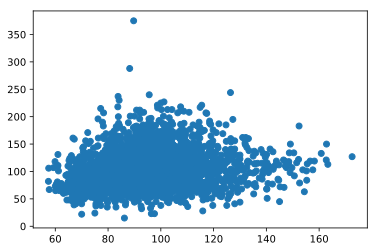

In [707]:
plt.scatter(X,y)

In [708]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

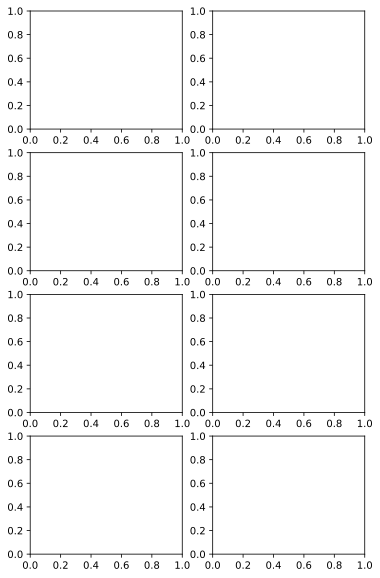

In [722]:
def f(x):
    return np.sin(x)

def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
#    ax.plot(np.linspace(0,np.pi*2,1000), f(np.linspace(0,np.pi*2,1000)), label='ground truth', c='g')
    ax.scatter(X_train, y_train, s=50,c='b',label='train')
    ax.scatter(X_test, y_test, s=50,c='r',label='test')
#    ax.plot(est.predict(X_train),c='b',label='model')
#     ax.set_ylim((-2, 2))
#     ax.set_xlim((0, 250))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)
    ax.set_title(label,fontsize=20)
    
    
def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.steps[-1][1].coef_.ravel() # flattens the data
    if yscale == 'log':
        ax.semilogy(np.abs(coef), marker='o', label=label)
        ax.set_ylim((1e-4, 1e10))
    else:
        ax.plot(np.abs(coef), marker='o', label=label)
        ax.set_ylabel('abs(coefficient)')
        ax.set_xlabel('coefficients')
        ax.set_xlim((1, 9))
        ax.set_ylim(-1000,1e6)

fig, ax_rows = plt.subplots(4, 2, figsize=(6, 10))

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


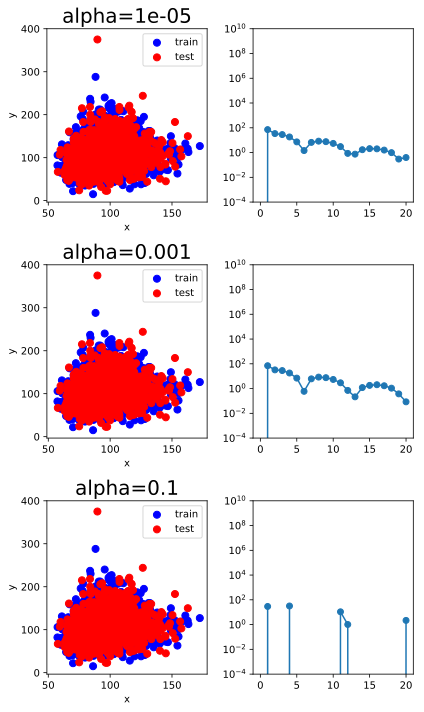

In [723]:
from sklearn.linear_model import Lasso

# Create only 2 plot rows, only trying 2 alphas
fig, ax_rows = plt.subplots(3, 2, figsize=(6, 10))

# Plot the results next to the coefficient values for each of hte 2 alphas
degree = 20
alphas = [1e-5, 1e-3, 1e-1]

sse_tr_Lasso = []
sse_te_Lasso = []
r2_tr_Lasso = []
r2_te_Lasso = []
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Lasso(alpha=alpha))
    est.fit(X_train, y_train)
    sse_tr_Lasso.append(mean_squared_error(y_train, est.predict(X_train)))
    sse_te_Lasso.append(mean_squared_error(y_test, est.predict(X_test)))
    r2_tr_Lasso.append(est.score(X_train,y_train))
    r2_te_Lasso.append(est.score(X_test,y_test))


    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='Lasso(alpha=%r) coefficients' % alpha)#, yscale=None)

plt.tight_layout()

In [201]:
df.fillna?

In [ ]:
df.dropna?

In [227]:
p_list=['(']
p_list.pop()
p_list

[]